In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

## Load data

In [2]:
#loading the dataset in pandas dataframe
data = pd.read_csv('Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.shape

(1470, 35)

In [8]:
data.size

51450

In [9]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:ylabel='Department'>

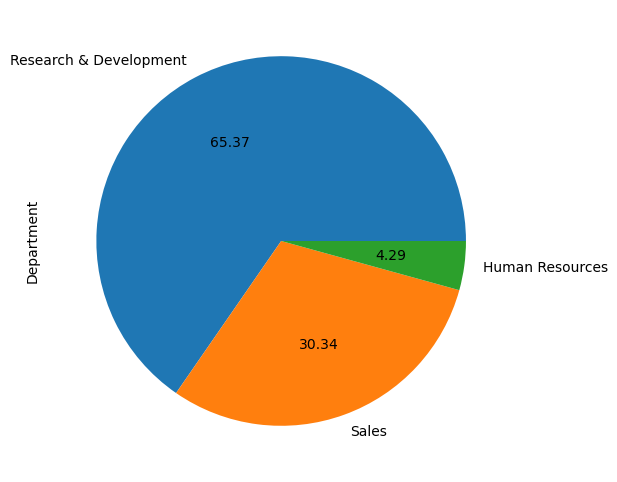

In [12]:
plt.figure(figsize=(8,6))
data['Department'].value_counts().plot(kind='pie',autopct='%.2f')

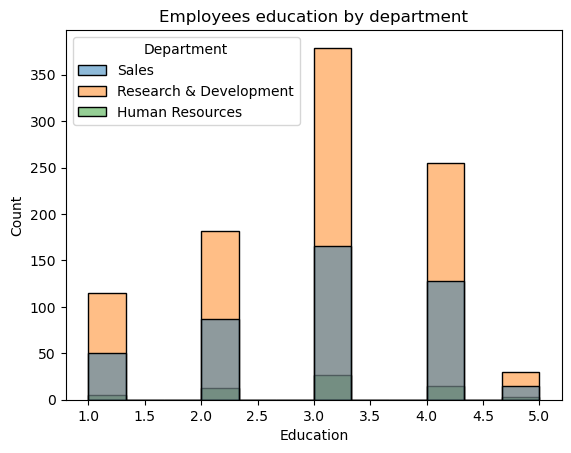

In [82]:
plt.title("Employees education by department")
sns.histplot(x="Education", hue='Department', data=data)
plt.show()

In [13]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:ylabel='EducationField'>

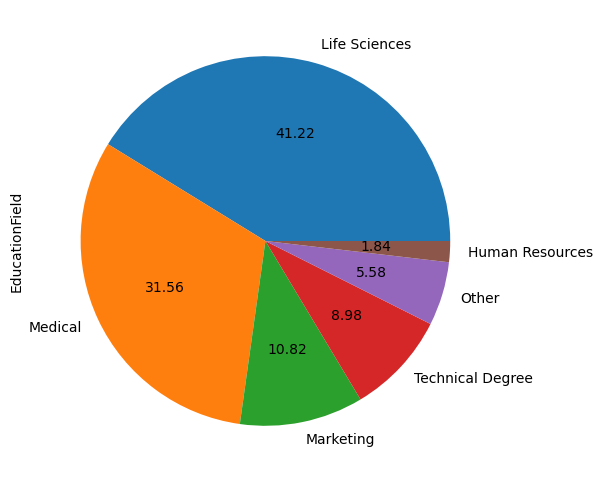

In [14]:
plt.figure(figsize=(8,6))
data['EducationField'].value_counts().plot(kind='pie',autopct='%.2f')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

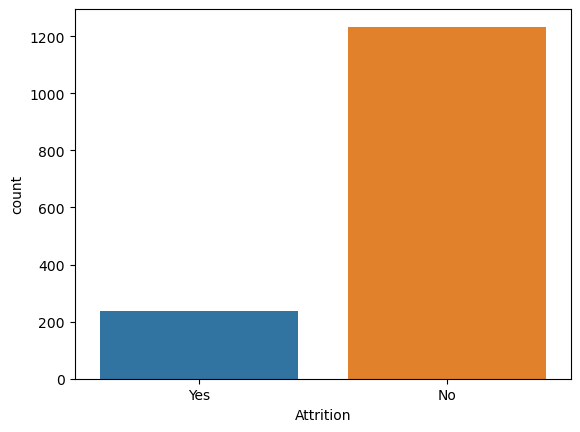

In [15]:
sns.countplot(data['Attrition'])

In [16]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

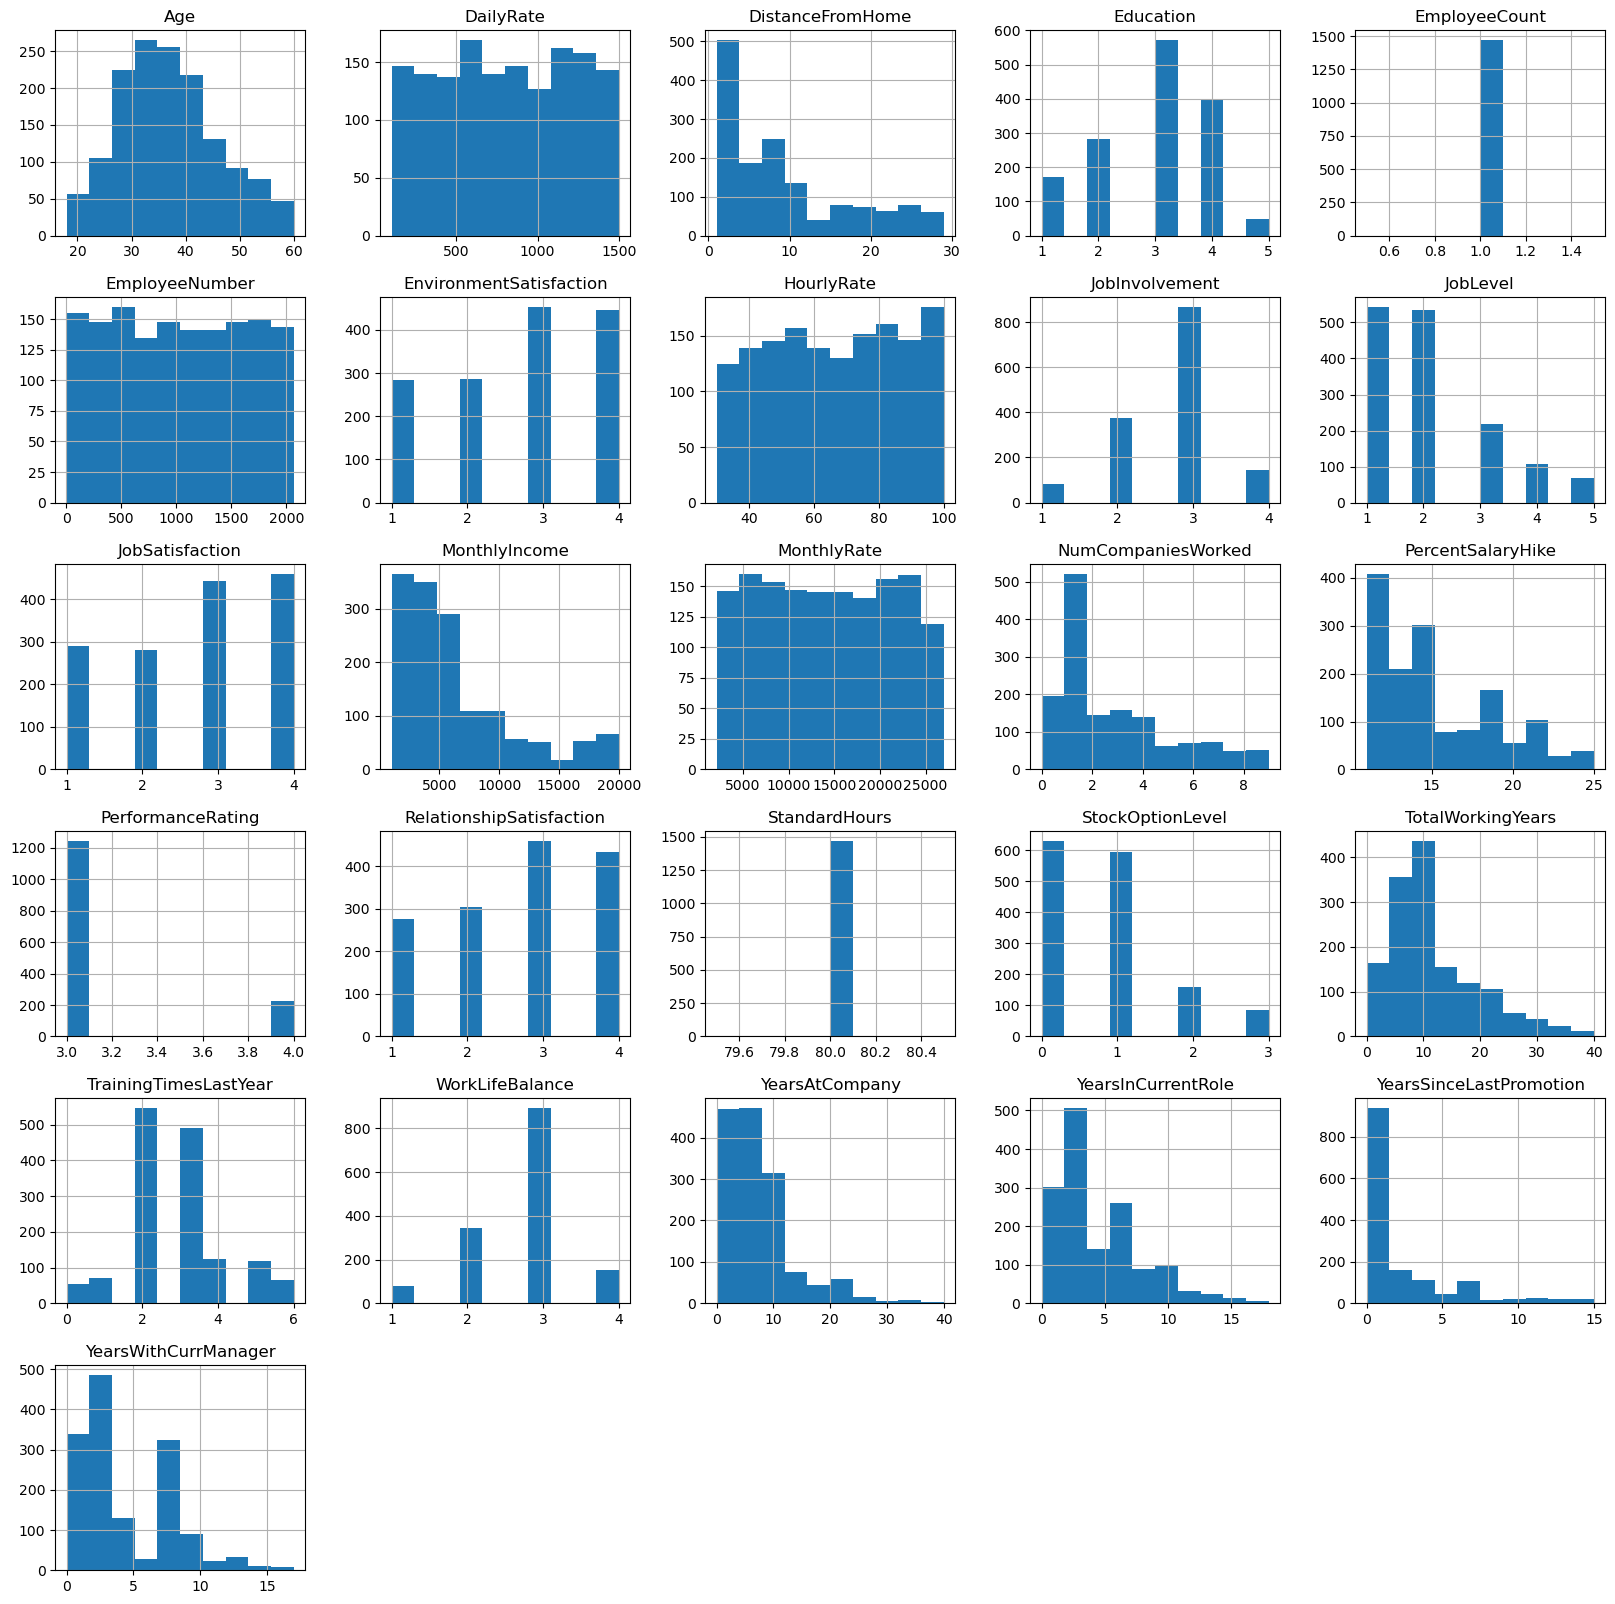

In [17]:
# Plotting the numerical variables in histograms to see their distribution.
data.hist(figsize=(20,20))
plt.show()

In [18]:
data['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

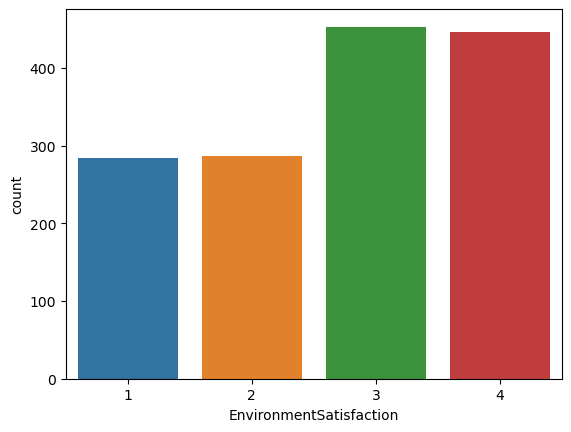

In [19]:
sns.countplot(data['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='Age', ylabel='count'>

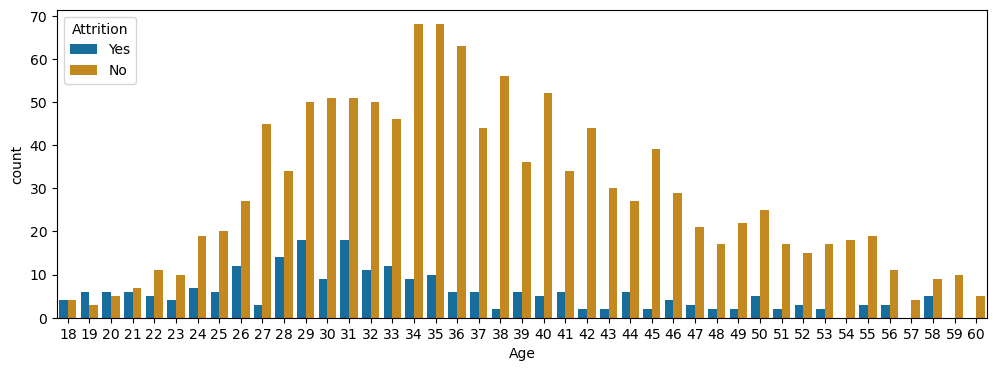

In [20]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=data, palette = 'colorblind')

<AxesSubplot:xlabel='Gender', ylabel='count'>

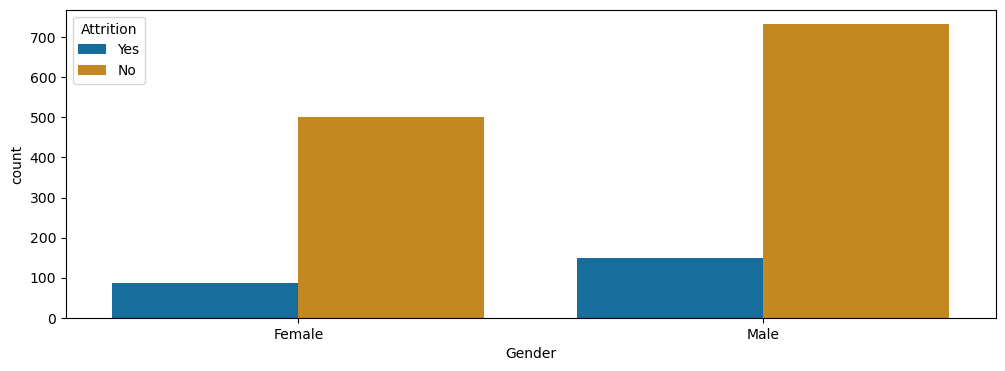

In [21]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Gender', hue='Attrition', data=data, palette = 'colorblind')

<AxesSubplot:xlabel='Department', ylabel='count'>

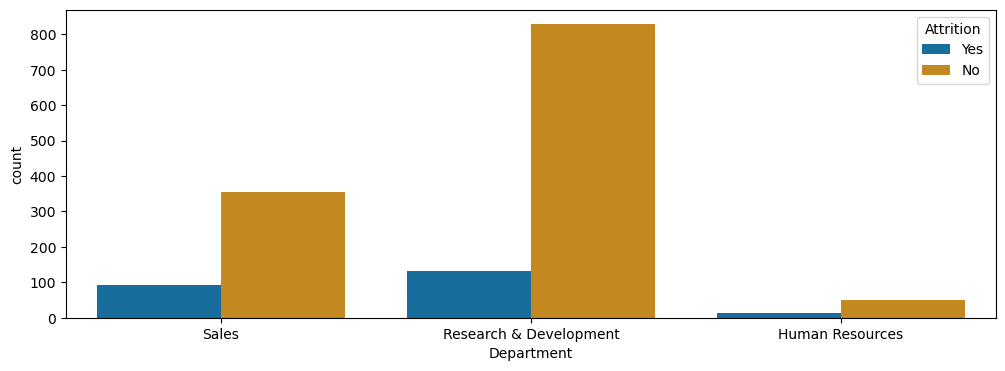

In [22]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Department', hue='Attrition', data=data, palette = 'colorblind')

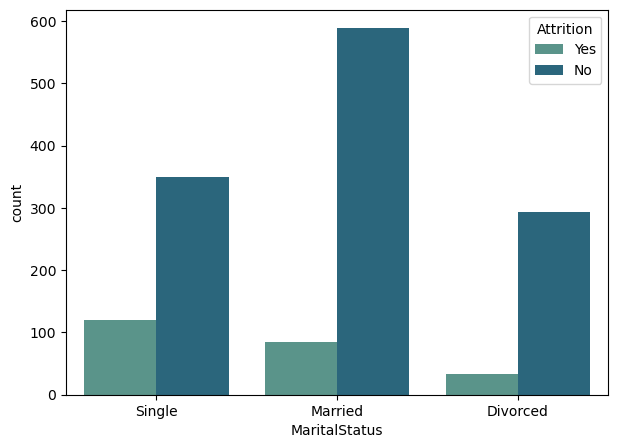

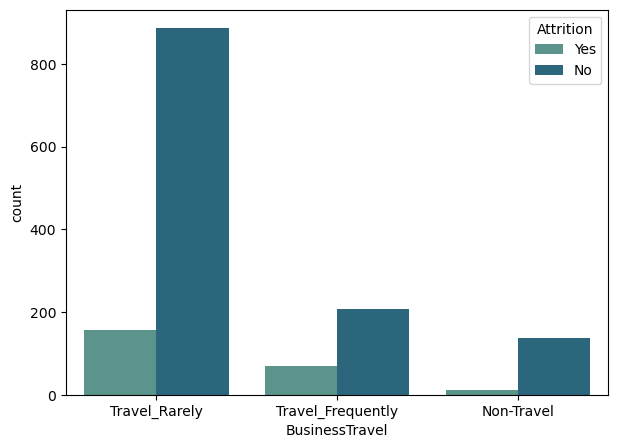

In [23]:
def plt_bar(i):
    plt.figure(figsize=(7,5))
    ax=sns.countplot(x=data[i], hue="Attrition", data=data,palette='crest')
plt_bar('MaritalStatus')
plt_bar('BusinessTravel')

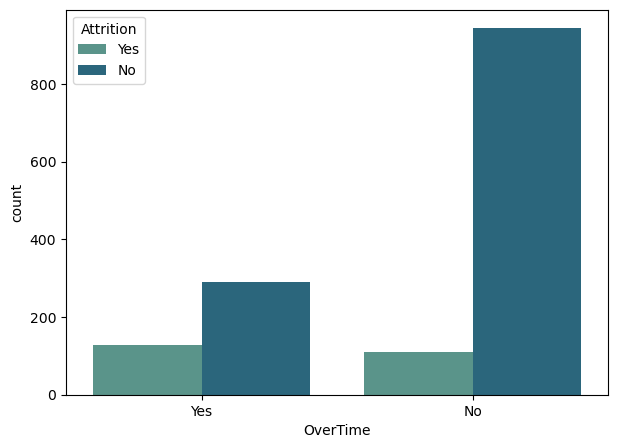

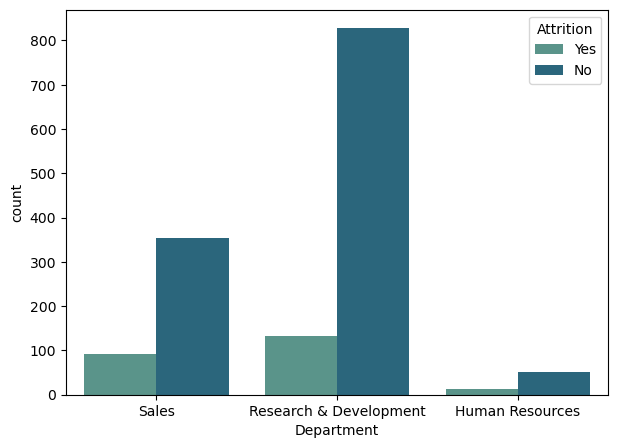

In [24]:
plt_bar('OverTime')
plt_bar('Department')

In [25]:
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'H

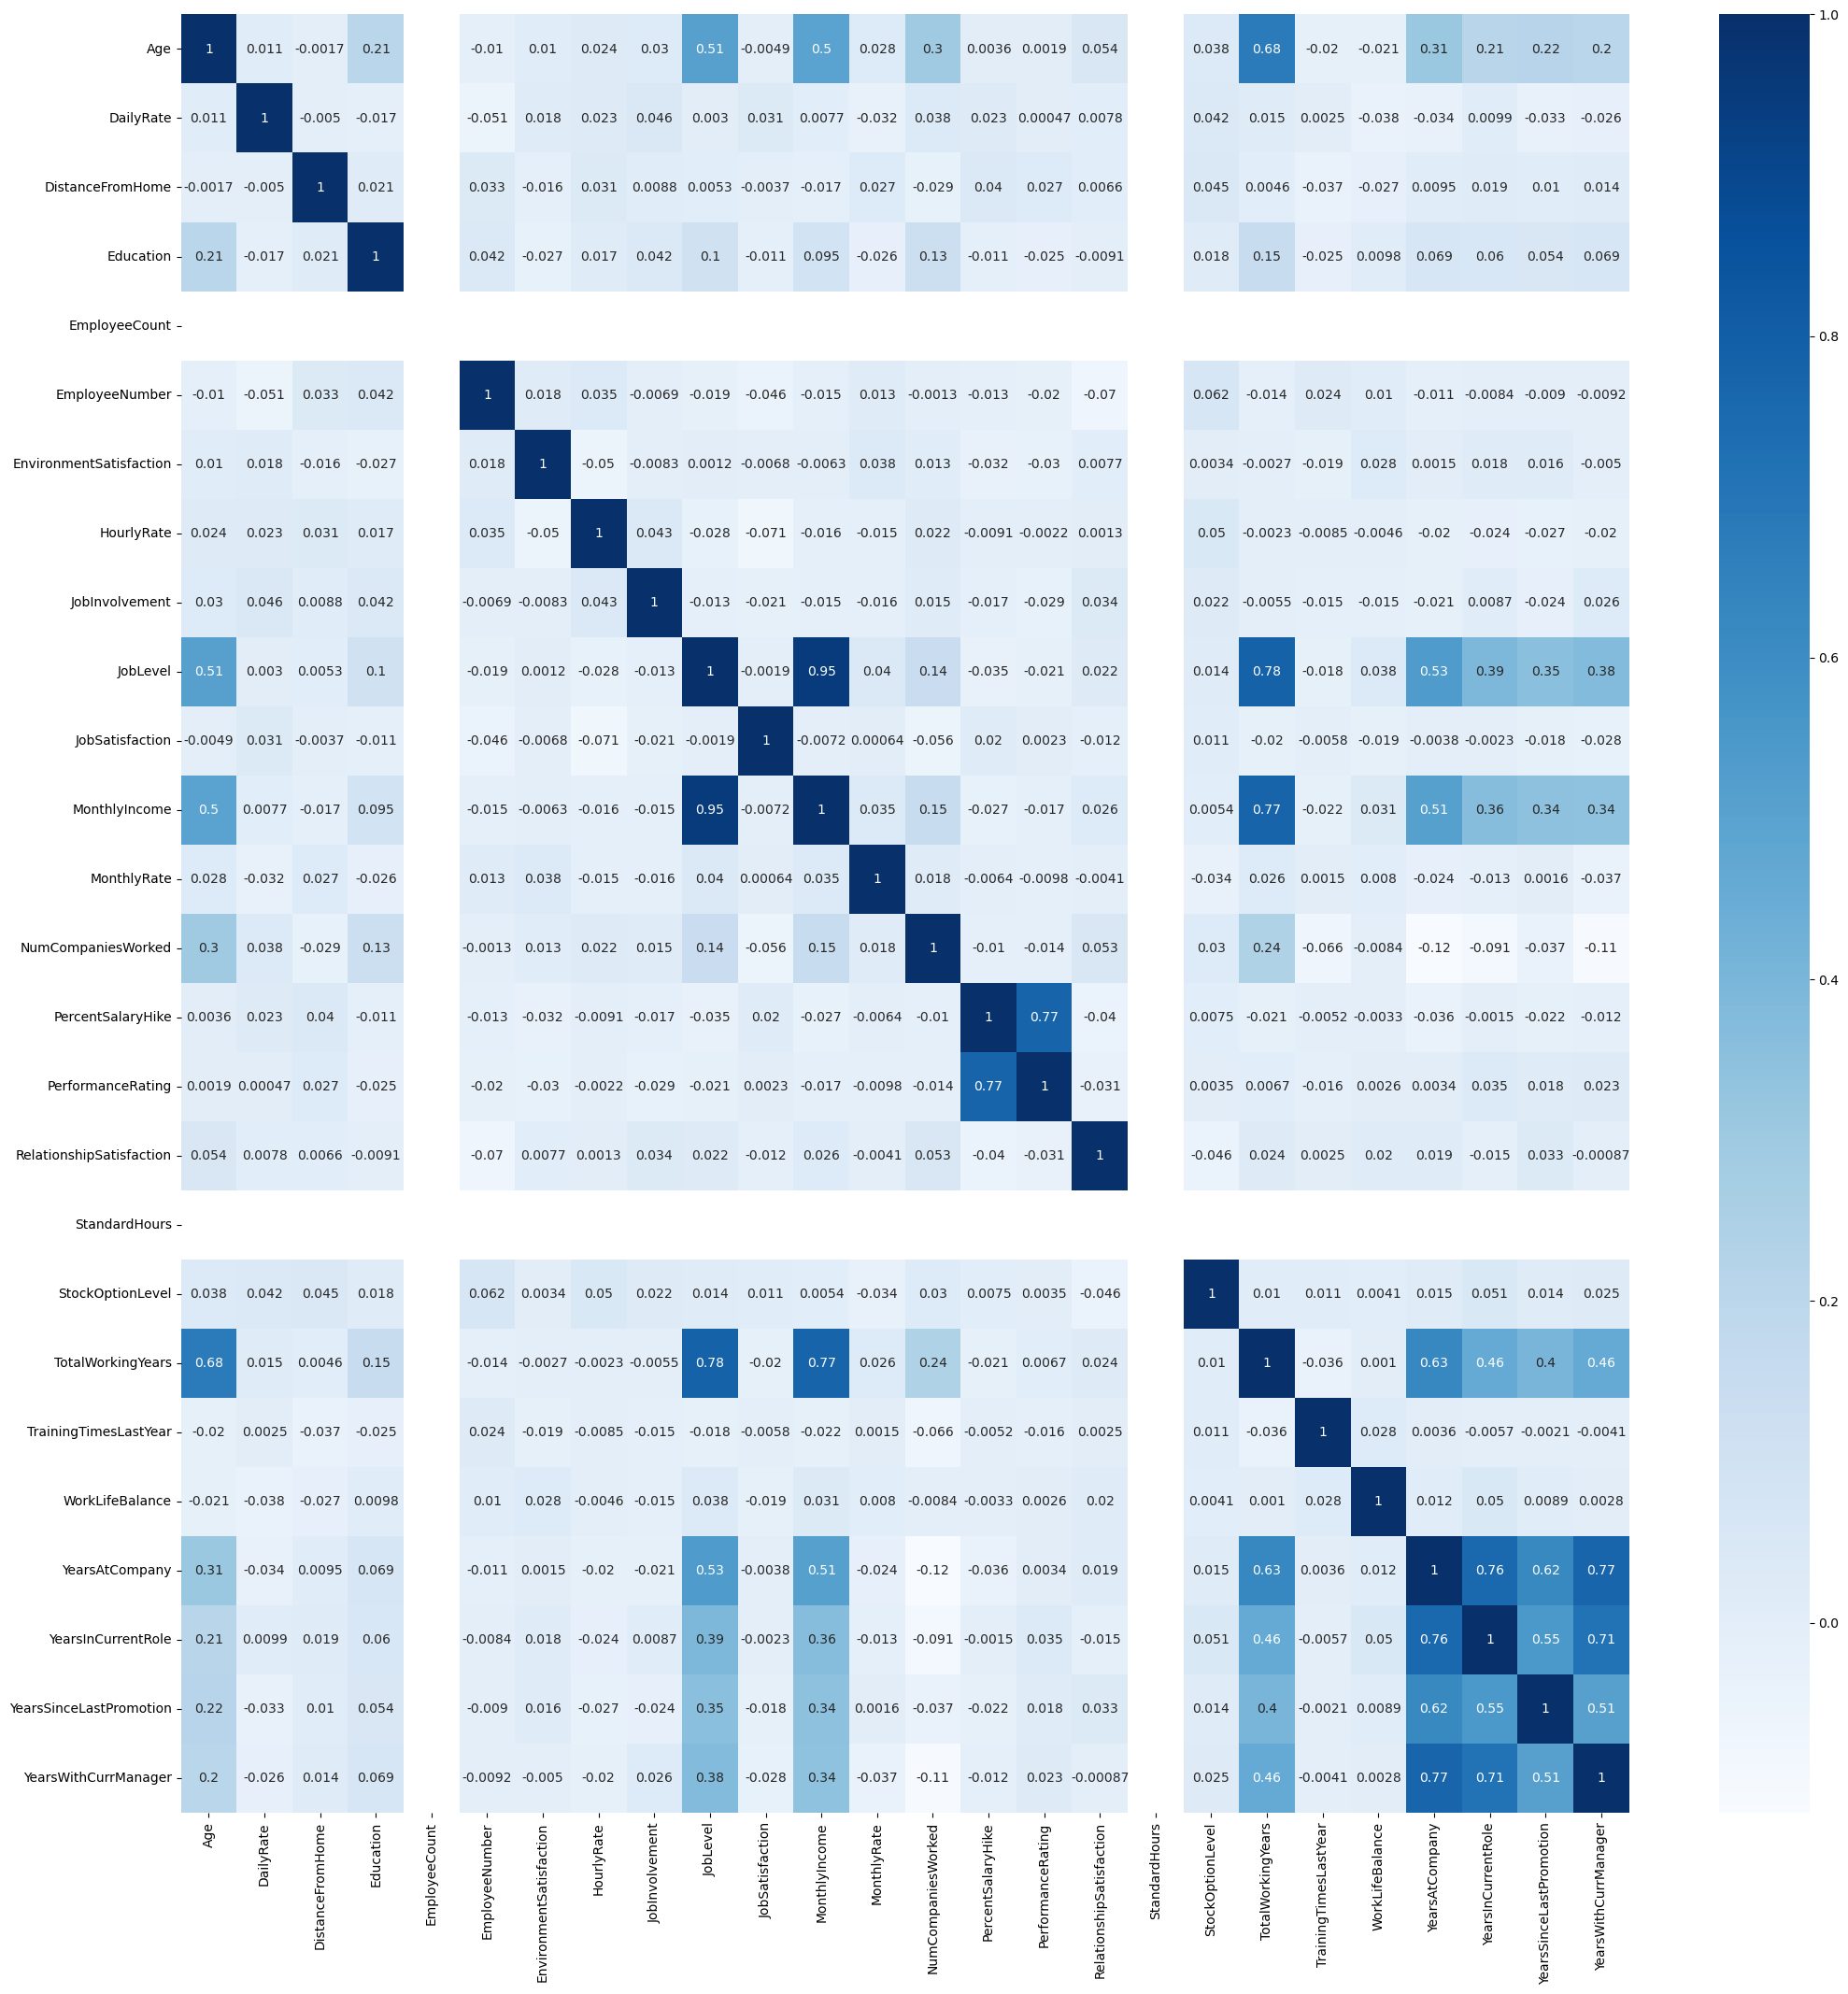

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap=('Blues'))
plt.show()

In [31]:
#droping some of the unwanted columns
data=data.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1)

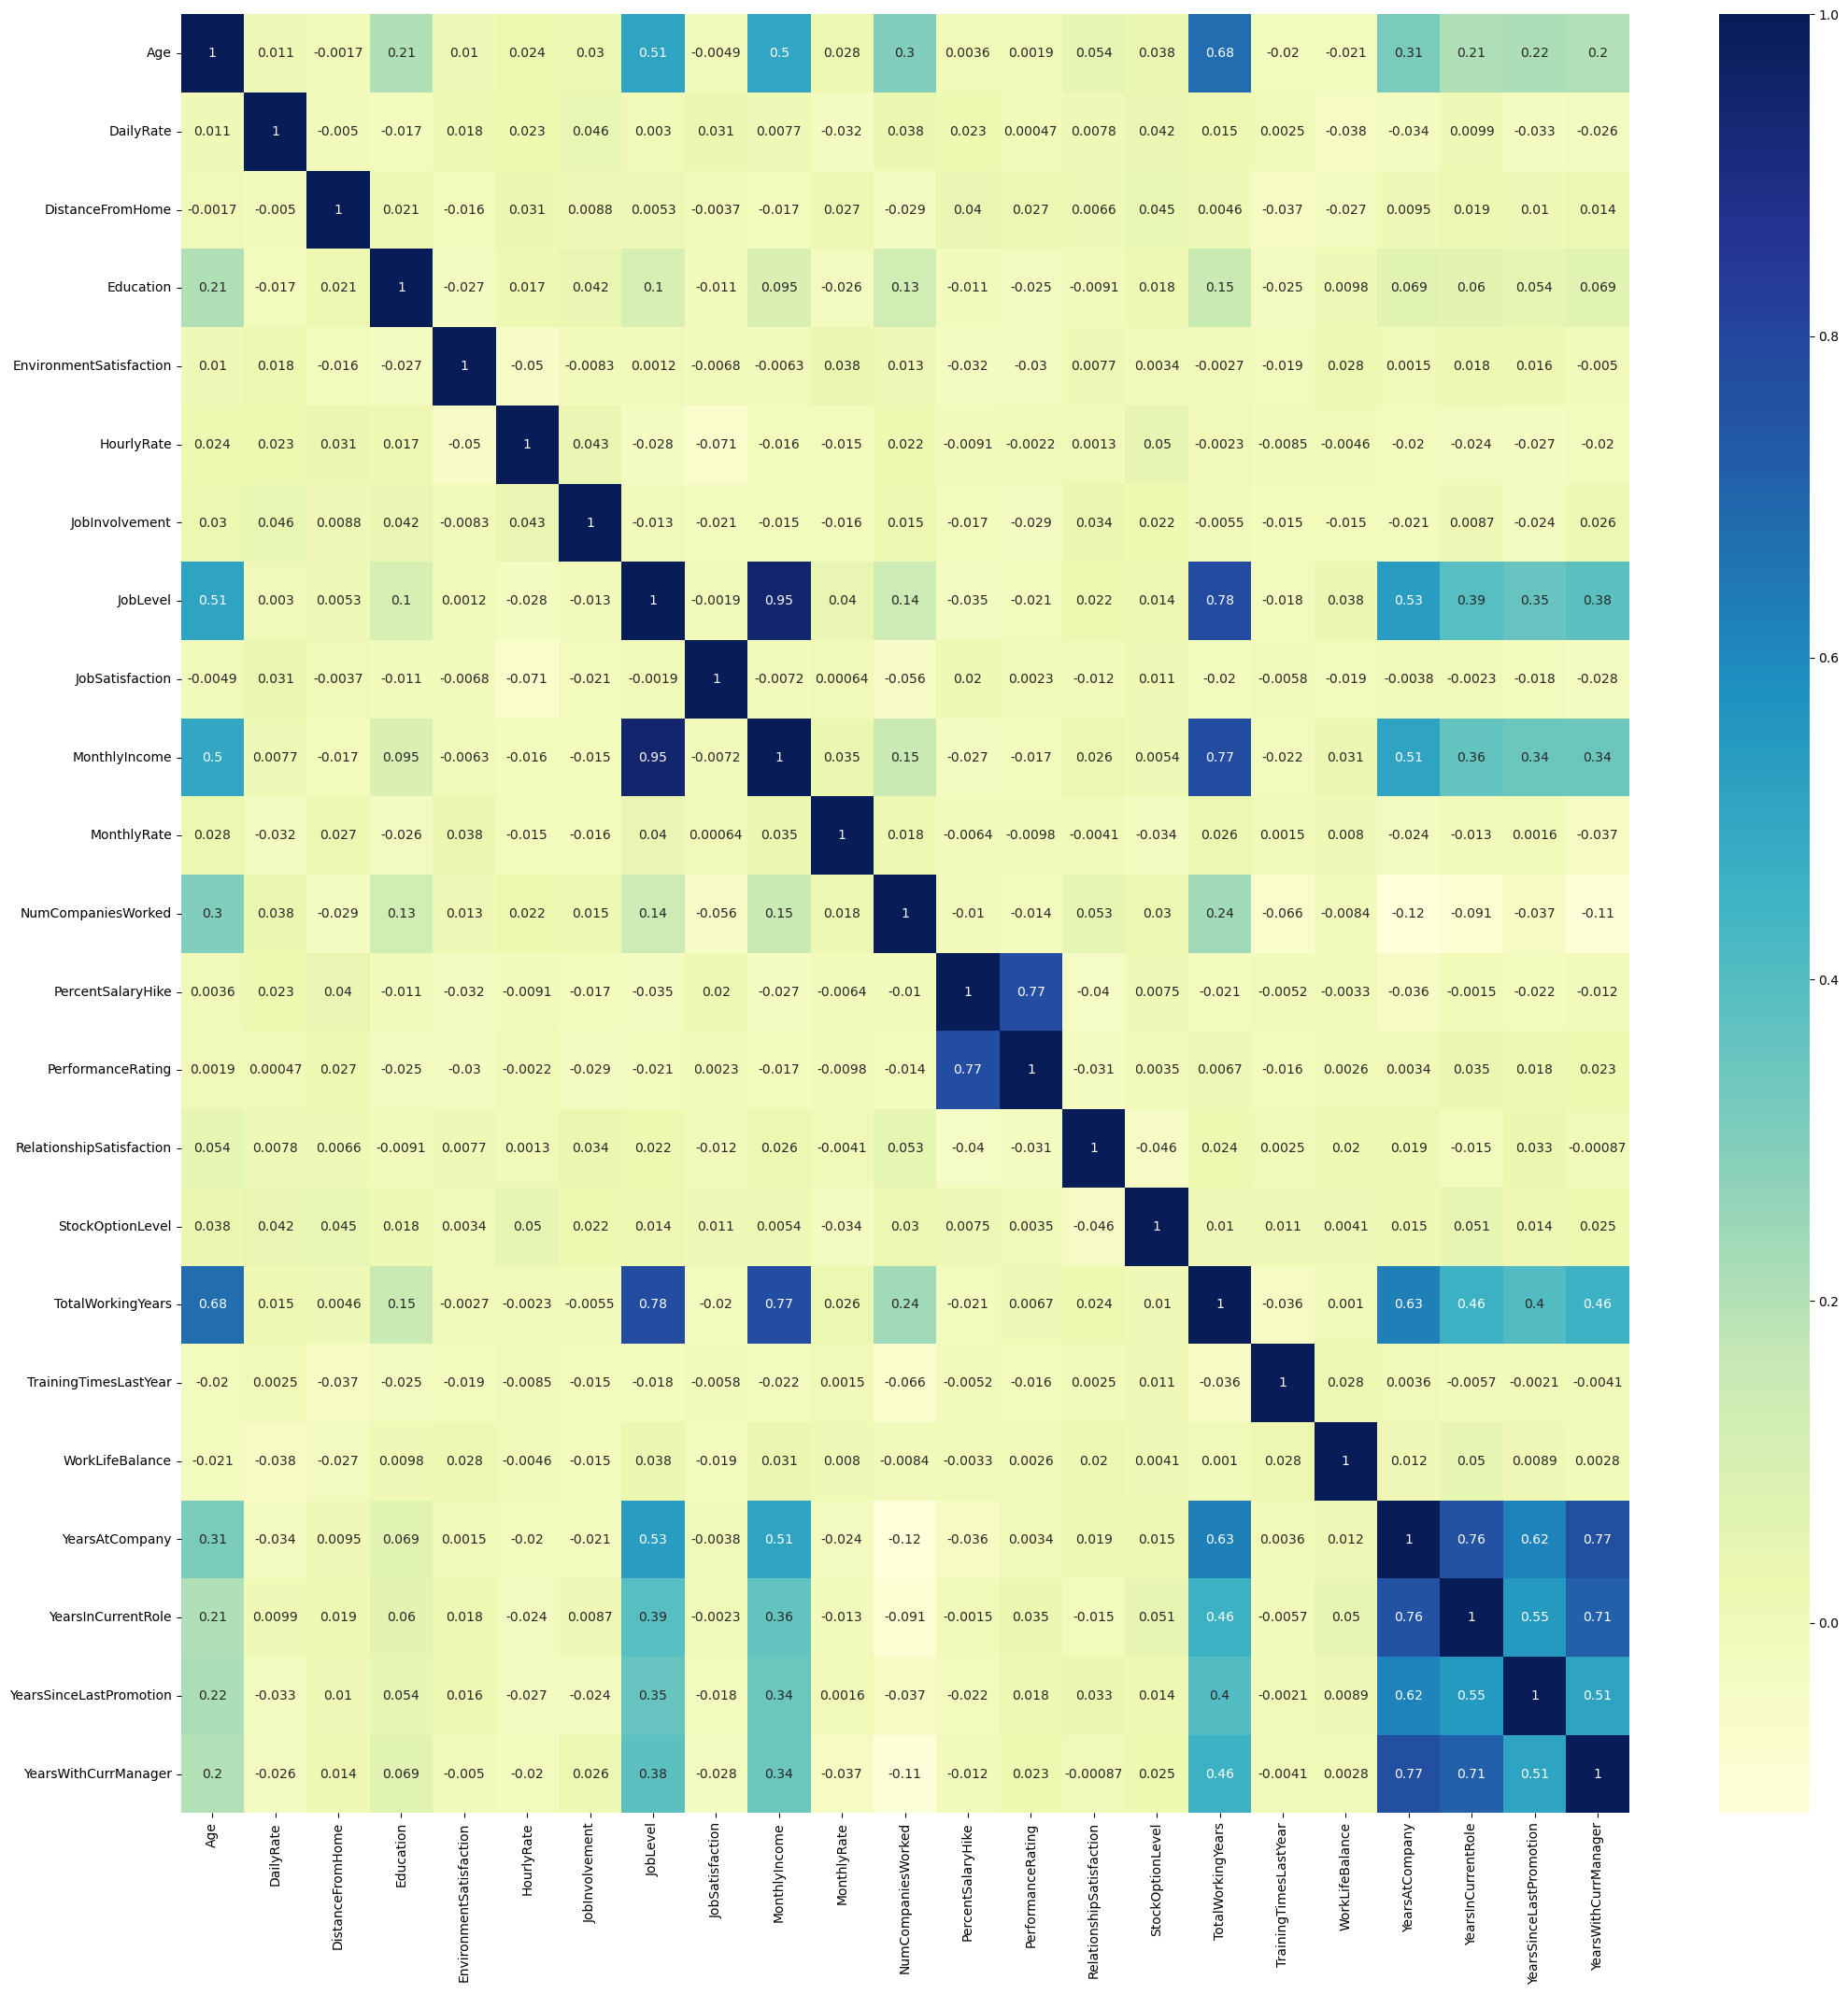

In [34]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

Number of Attrition: Out of 1470 nos. of employee 237 Employees left the Job and
are the reason of attrition employees
Cleary dat we have got is unbalanced to make prediction, hence we have to consider
it at the time of model prediction and creating Model Training and Model Testing

In [28]:
data['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [29]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [36]:
#Extracting the Numeric and Categorical features
data_num = pd.DataFrame(data = data.select_dtypes(include = ['int64']))
data_cat = pd.DataFrame(data = data.select_dtypes(include = ['object']))
print("Shape of Numeric: ",data_num.shape)
print("Shape of Categorical: ",data_cat.shape)

Shape of Numeric:  (1470, 23)
Shape of Categorical:  (1470, 8)


In [42]:
#Dropping 'Attrition' from df_cat before encoding
data_cat = data_cat.drop(['Attrition'], axis=1) 

#Encoding using Pandas' get_dummies
data_cat_encoded = pd.get_dummies(data_cat)
data_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [43]:
#Using StandardScaler to scale the numeric features
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_num_scaled = standard_scaler.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data = data_num_scaled, columns = data_num.columns, index = data_num.index)

In [44]:
print("Shape of Numeric After Scaling: ",data_num_scaled.shape)
print("Shape of categorical after Encoding: ",data_cat_encoded.shape)

Shape of Numeric After Scaling:  (1470, 23)
Shape of categorical after Encoding:  (1470, 28)


In [47]:
#Combining the Categorical and Numeric features
data_transformed_final = pd.concat([data_num_scaled,data_cat_encoded], axis = 1)
print("Shape of final dataframe: ",data_transformed_final.shape)

Shape of final dataframe:  (1470, 51)


In [48]:
#Extracting the target variable - 'Attrition'
target = data['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

#Copying into commonly used fields for simplicity
X = data_transformed_final #Features
Y = target #Target

Shape of target:  (1470,)


# Spliting data for Model Training and Testing

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=50)
print("Shape of Train Dataset: ",x_train.shape)
print("Shape of Test Dataset: ",x_test.shape)

Shape of Train Dataset:  (1176, 51)
Shape of Test Dataset:  (294, 51)


In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=227)

In [53]:
x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
744,0.008343,0.839212,0.223033,-0.891688,-1.575686,-0.240677,-2.432006,-0.057788,-0.660853,-0.366724,...,0,0,0,0,0,0,1,0,1,0
1290,-0.320163,-1.409334,-0.023755,1.061787,1.169781,1.333932,0.379672,-0.057788,-1.567907,-0.245823,...,0,0,0,0,0,0,1,0,1,0
307,0.117845,0.115314,1.950552,-0.891688,-1.575686,0.743454,-1.026167,0.845911,-0.660853,1.180971,...,0,1,0,0,0,0,1,0,1,0
924,-0.210661,-0.167304,-0.393938,-1.868426,0.254625,0.005356,0.379672,-0.961486,0.246200,-0.636784,...,0,0,1,0,0,0,1,0,0,1
718,0.884358,-1.374627,1.703764,-0.891688,1.169781,-1.175601,0.379672,-0.057788,-1.567907,-0.609799,...,0,0,0,0,0,0,1,0,0,1


In [54]:
y_train.head()

744     1
1290    1
307     0
924     0
718     0
Name: Attrition, dtype: int64

# Random Forest Classifier

In [64]:
for w in range(100,1000,50):
    rf_clf_gs=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=227)
    rf_clf_gs.fit(x_train, y_train)
    oob=rf_clf_gs.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 100
OOB score is 0.847424684159378
************************
For n_estimators = 150
OOB score is 0.8551992225461613
************************
For n_estimators = 200
OOB score is 0.8542274052478134
************************
For n_estimators = 250
OOB score is 0.8522837706511176
************************
For n_estimators = 300
OOB score is 0.8464528668610302
************************
For n_estimators = 350
OOB score is 0.8464528668610302
************************
For n_estimators = 400
OOB score is 0.8454810495626822
************************
For n_estimators = 450
OOB score is 0.8464528668610302
************************
For n_estimators = 500
OOB score is 0.847424684159378
************************
For n_estimators = 550
OOB score is 0.8464528668610302
************************
For n_estimators = 600
OOB score is 0.8493683187560739
************************
For n_estimators = 650
OOB score is 0.847424684159378
************************
For n_estimators = 700
OOB score is 0.84742

In [65]:
rf_clf_best=RandomForestClassifier(n_estimators=360,oob_score=True,n_jobs=-1,random_state=227)
rf_clf_best.fit(x_train, y_train)
y_test_pred_rf = rf_clf_best.predict(x_test)
rf_clf_best.oob_score_

0.8464528668610302

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

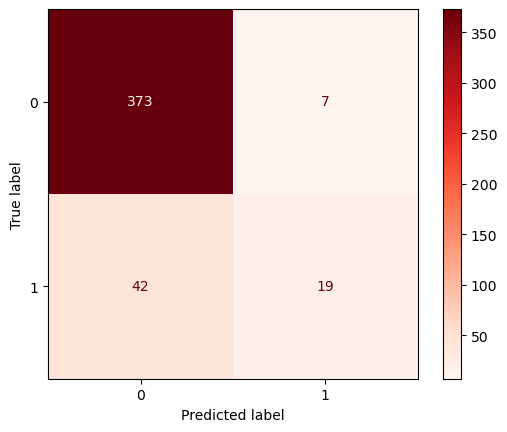

In [66]:
plot_confusion_matrix(rf_clf_best,x_test,y_test,cmap='Reds')
plt.grid(False)
plt

In [70]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.73      0.31      0.44        61

    accuracy                           0.89       441
   macro avg       0.81      0.65      0.69       441
weighted avg       0.88      0.89      0.87       441



# Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.81859410430839

In [72]:
tree.score(x_train,y_train)

1.0

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

clf = confusion_matrix(y_test, tree.predict(x_test))

In [75]:
clf

array([[333,  47],
       [ 39,  22]], dtype=int64)

<AxesSubplot:>

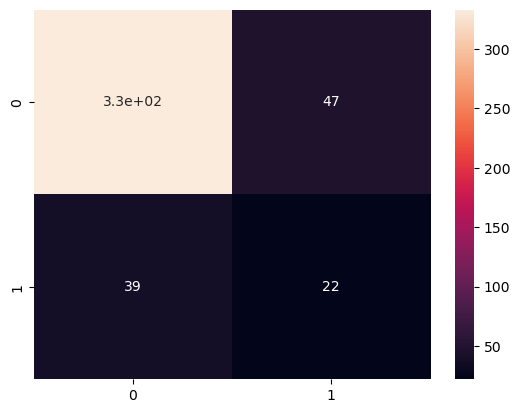

In [76]:
sns.heatmap(clf,annot=True)